In [1]:
%matplotlib inline
import cartopy
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
# import h3pandas
import numpy as np
import sys
sys.path.append('/Users/hydros/Documents/Software/python/PlotGallary')
from matplotlibconfig import basic
import proplot as pplt
basic()


In [2]:
gdf= gpd.read_file('tornado_loc.shp')

In [3]:
counties = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
counties.set_index('id',inplace=True)

In [6]:
counties['tornadoes']= gpd.sjoin(counties, gdf[['geometry']], how='left').groupby('id').size()

/var/folders/c7/5k73klb12cg2ysz6c890vdm00000gn/T/ipykernel_19315/1530951499.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  counties['tornadoes']= gpd.sjoin(counties, gdf[['geometry']], how='left').groupby('id').size()


In [7]:
proj = gcrs.LambertConformal(central_latitude = 25, 
                             central_longitude = 265, 
                             standard_parallels = (25, 25))

/Users/hydros/miniconda3/envs/pyart/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/hydros/miniconda3/envs/pyart/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


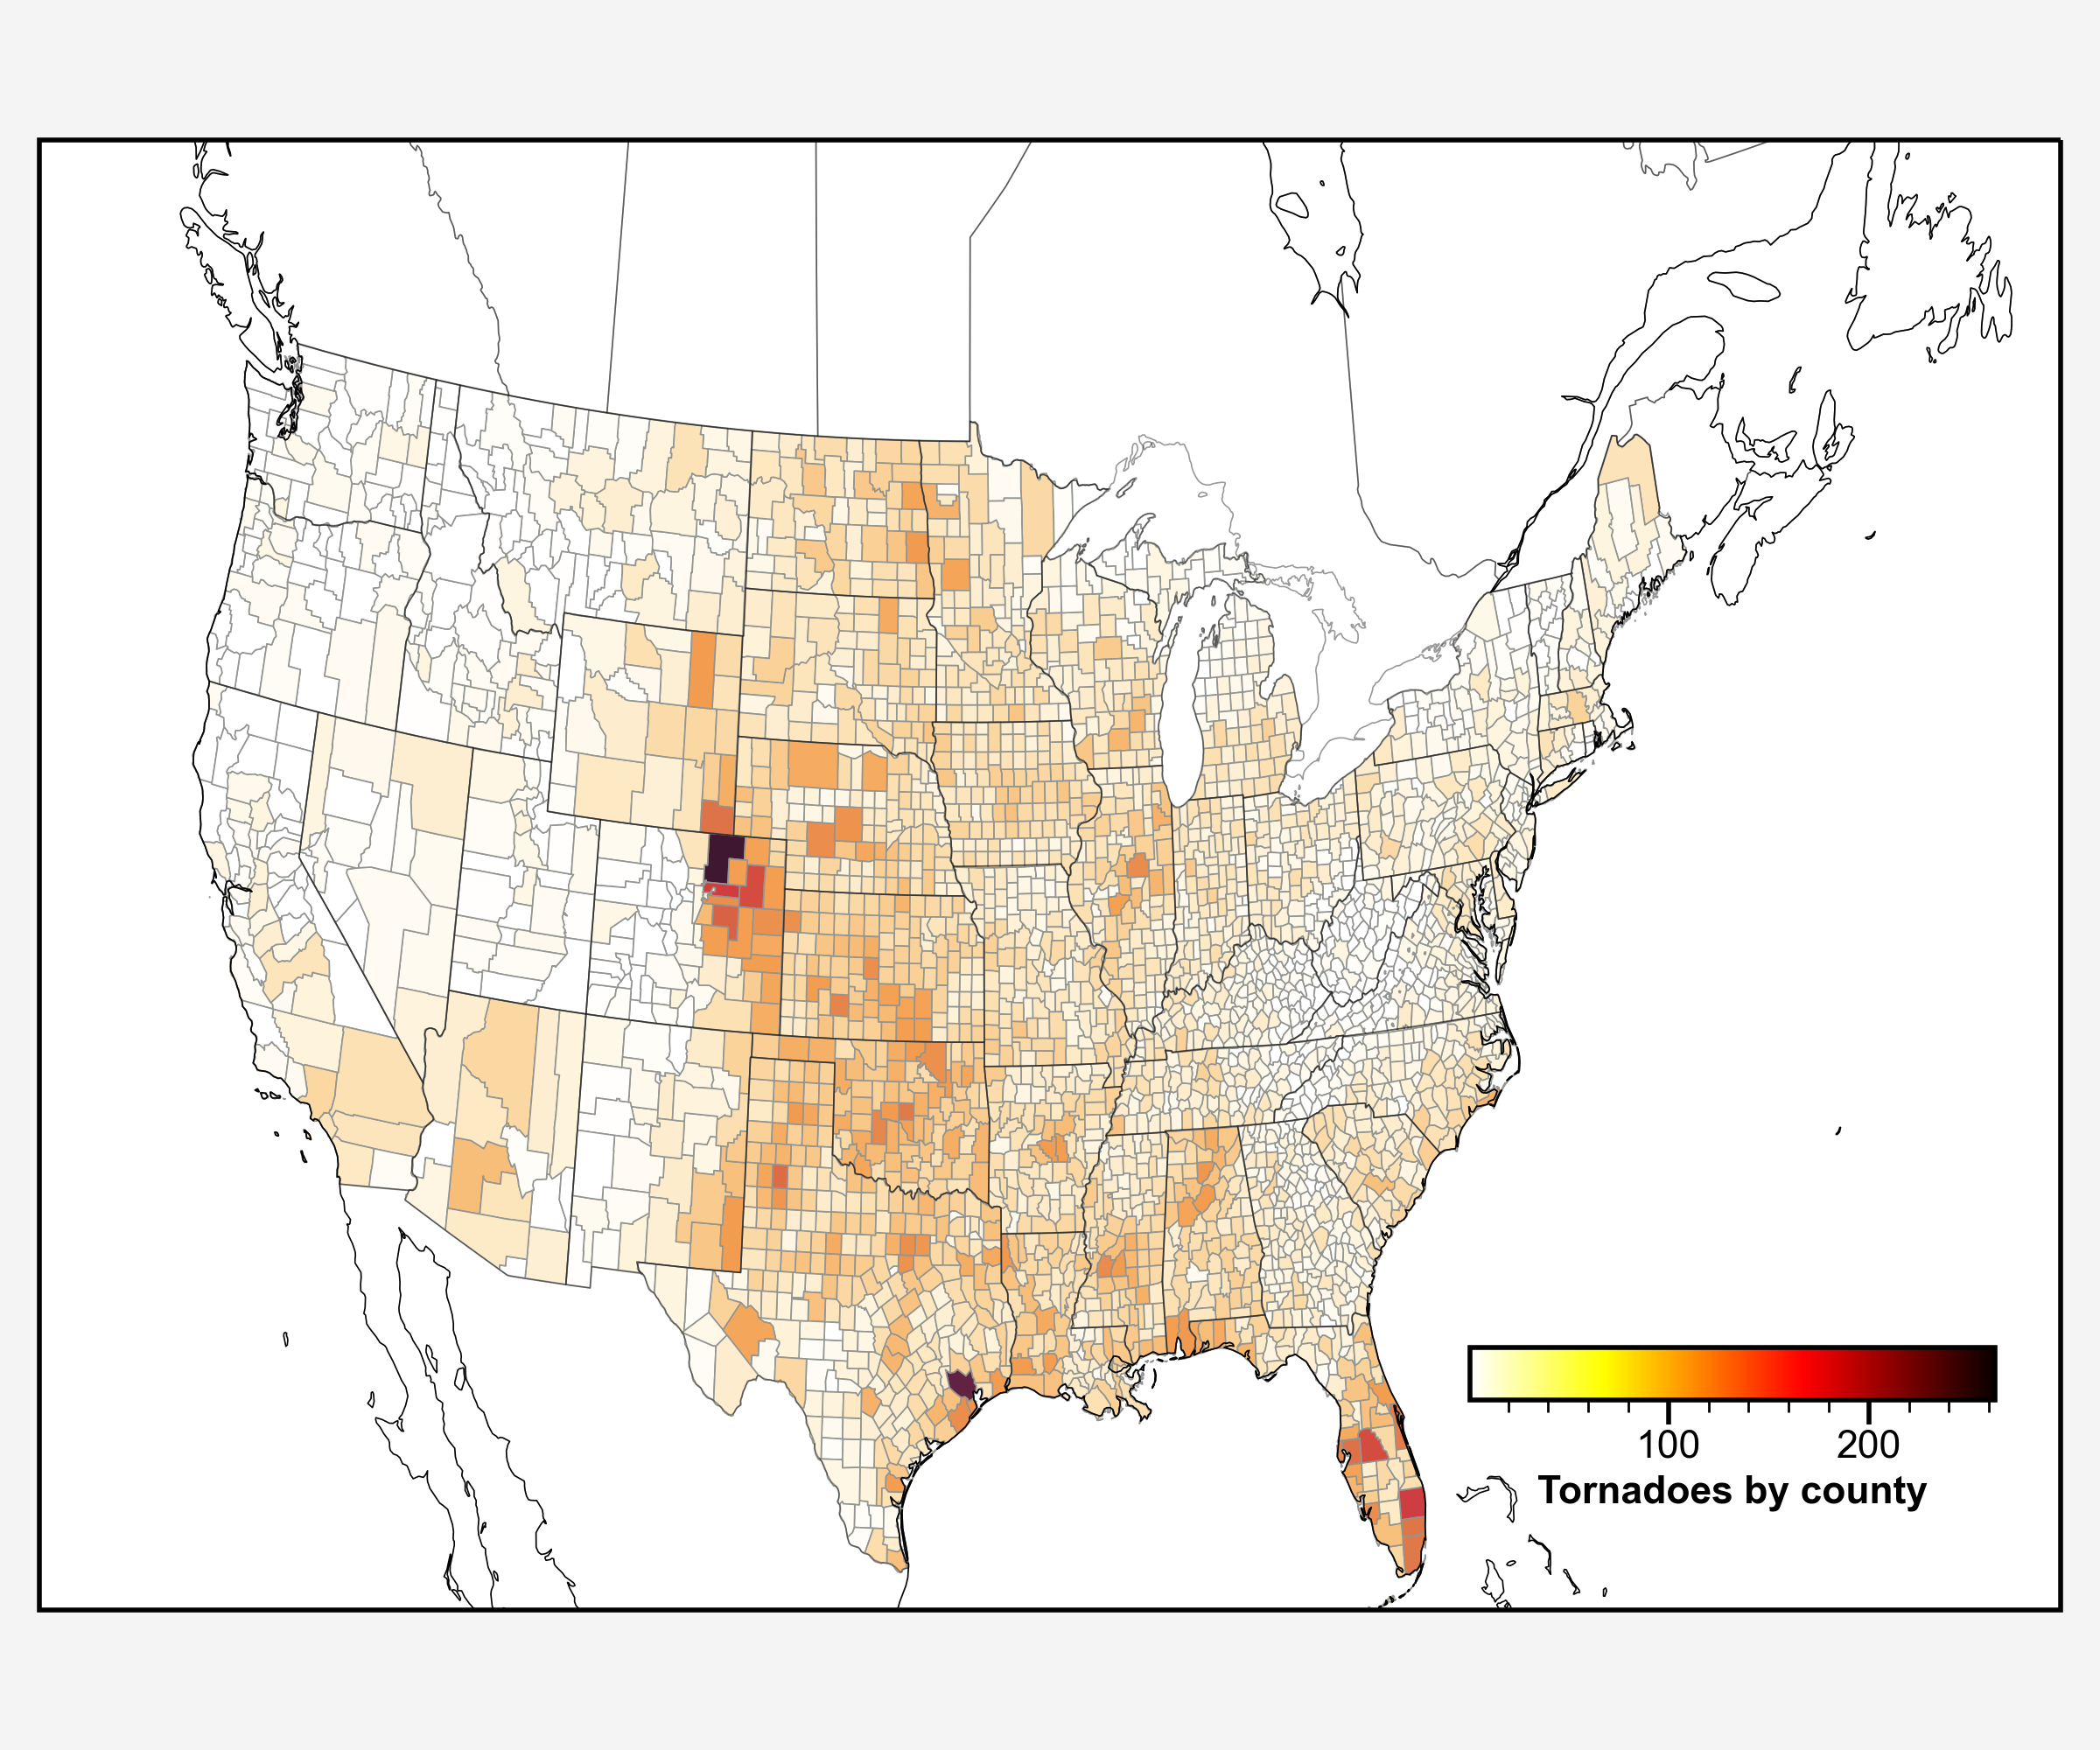

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig= plt.figure(figsize=(12,10))
ax= fig.add_subplot(111, projection=proj)



counties.plot('tornadoes', ax=ax, transform=cartopy.crs.PlateCarree(), ec='gray', legend=False,
              legend_kwds={'label': "# Tornadoes by county",
                        'orientation': "horizontal",})
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, alpha=0.4)


fig = ax.get_figure()
cax = fig.add_axes([0.7, 0.2, 0.25, 0.03])
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=counties['tornadoes'].min(), vmax=counties['tornadoes'].max()))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
cb= fig.colorbar(sm, cax=cax, orientation='horizontal')
cb.set_label('Tornadoes by county')
ax.set_extent([-125,-60,22,50])

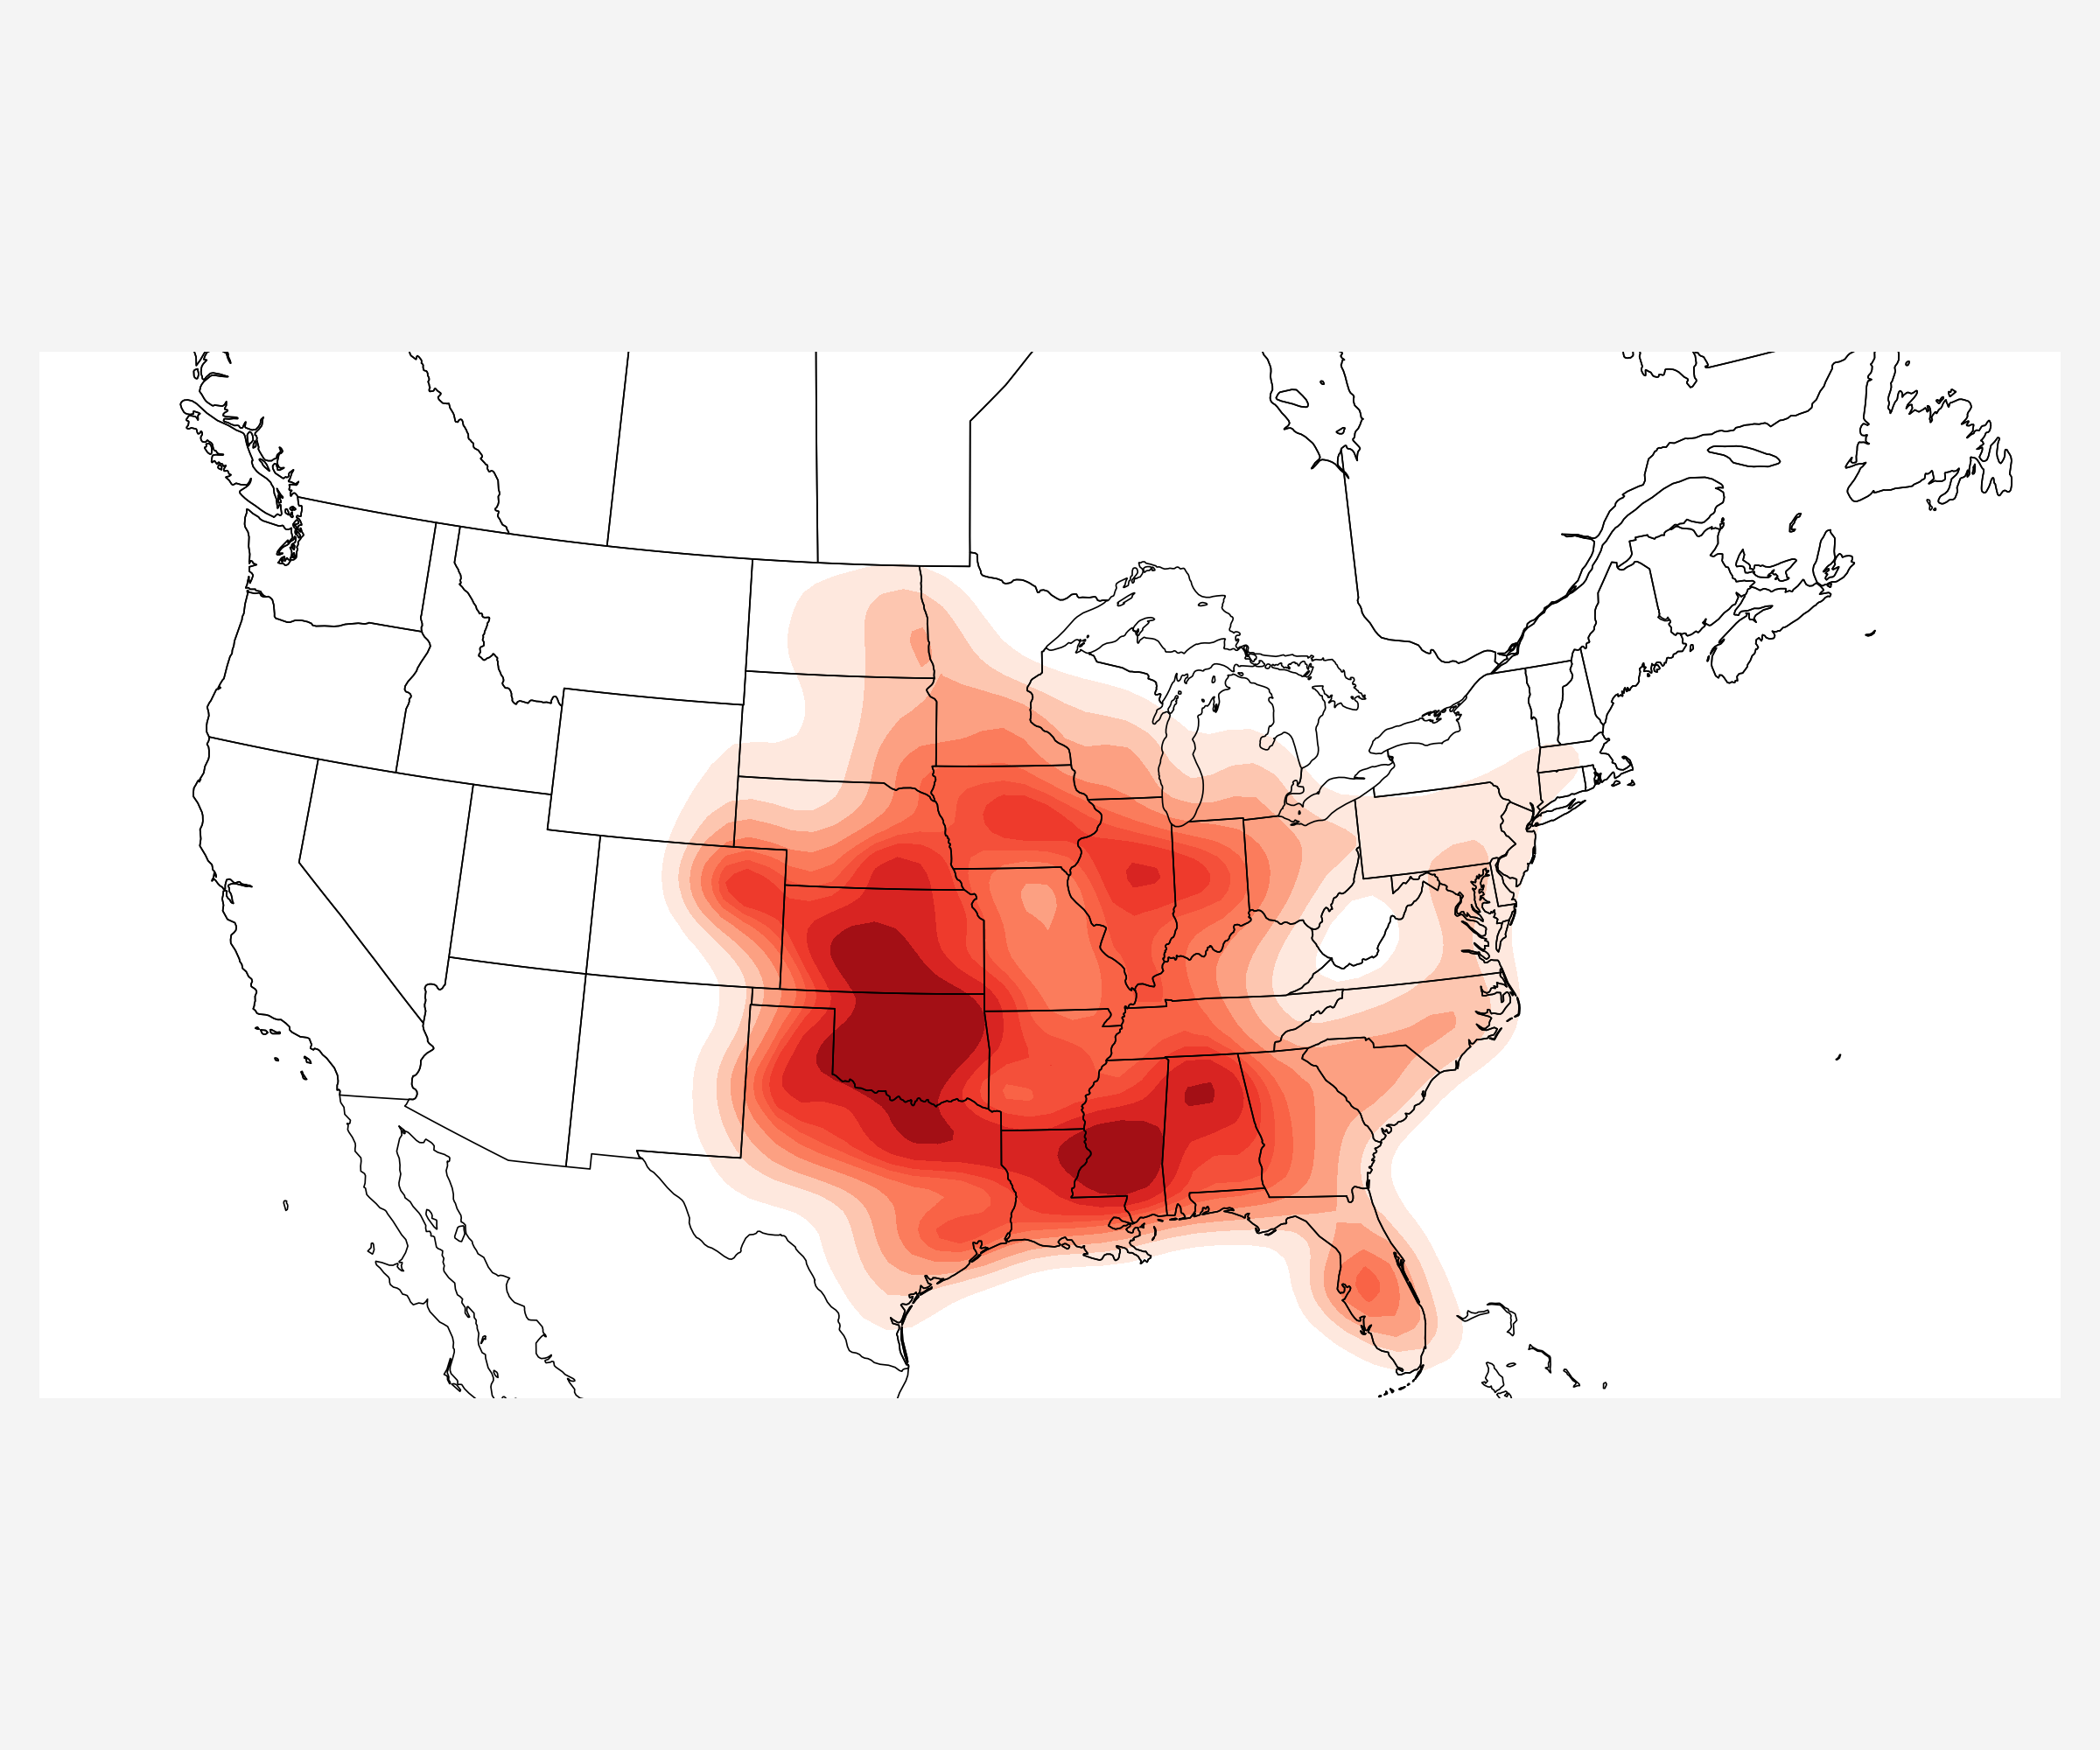

In [16]:

fig = plt.figure(figsize=(12, 10))
ax= fig.add_subplot(111, projection=proj)
gplt.kdeplot(
    gdf,
    cmap='Reds',
    projection=proj,
    shade=True, thresh=0.1,
    ax=ax
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.set_extent([-125,-60,22,50])

In [26]:
landuse_mapper = {
1: "Agriculture",
2: "Developed",
3: "Forest",
4: "Non-Forest Wetland",
5: "Other",
6: "Rangeland or Pasture",
7: "Non-Processing Area Mask",
}

lu_colors=['#efff6b', '#ff2ff8', '#1b9d0c', '#97ffff', '#a1a1a1', '#c2b34a', '#1B1716']

landcover_mapper = {
1:'Trees',
2:'Tall Shrubs & Trees Mix (SEAK Only)',
3:'Shrubs & Trees Mix',
4:'Grass/Forb/Herb & Trees Mix',
5:'Barren & Trees Mix',
6:'Tall Shrubs (SEAK Only)',
7:'Shrubs',
8:'Grass/Forb/Herb & Shrubs Mix',
9:'Barren & Shrubs Mix',
10:'Grass/Forb/Herb',
11:'Barren & Grass/Forb/Herb Mix',
12:'Barren or Impervious',
13:'Snow or Ice',
14:'Water',
15:'Non-Processing Area Mask'}

lc_colors= ['#005e00', '#008000', '#00cc00', '#b3ff1a', '#99ff99', '#b30088', '#e68a00', '#ffad33', '#ffe0b3',
           '#ffff00', '#AA7700', '#d3bf9b', '#C0D6E4', '#4780f3', '#1B1716']

In [27]:
from matplotlib.patches import Patch

In [76]:
gdf= gdf.drop('Unnamed_ 0', axis=1)

In [ ]:
gdf['ID']= [gdf.loc[] for i in range(len(gdf))]

In [27]:
len(gdf)

69204

In [109]:
gdf.TOR_F_SCAL.value_counts()

F0     19271
F1     16276
EF0     9745
F2      8765
EF1     6477
F3      2795
EF2     1815
F4       974
EF3      514
EFU      405
F5       122
EF4      116
EF5       14
Name: TOR_F_SCAL, dtype: int64

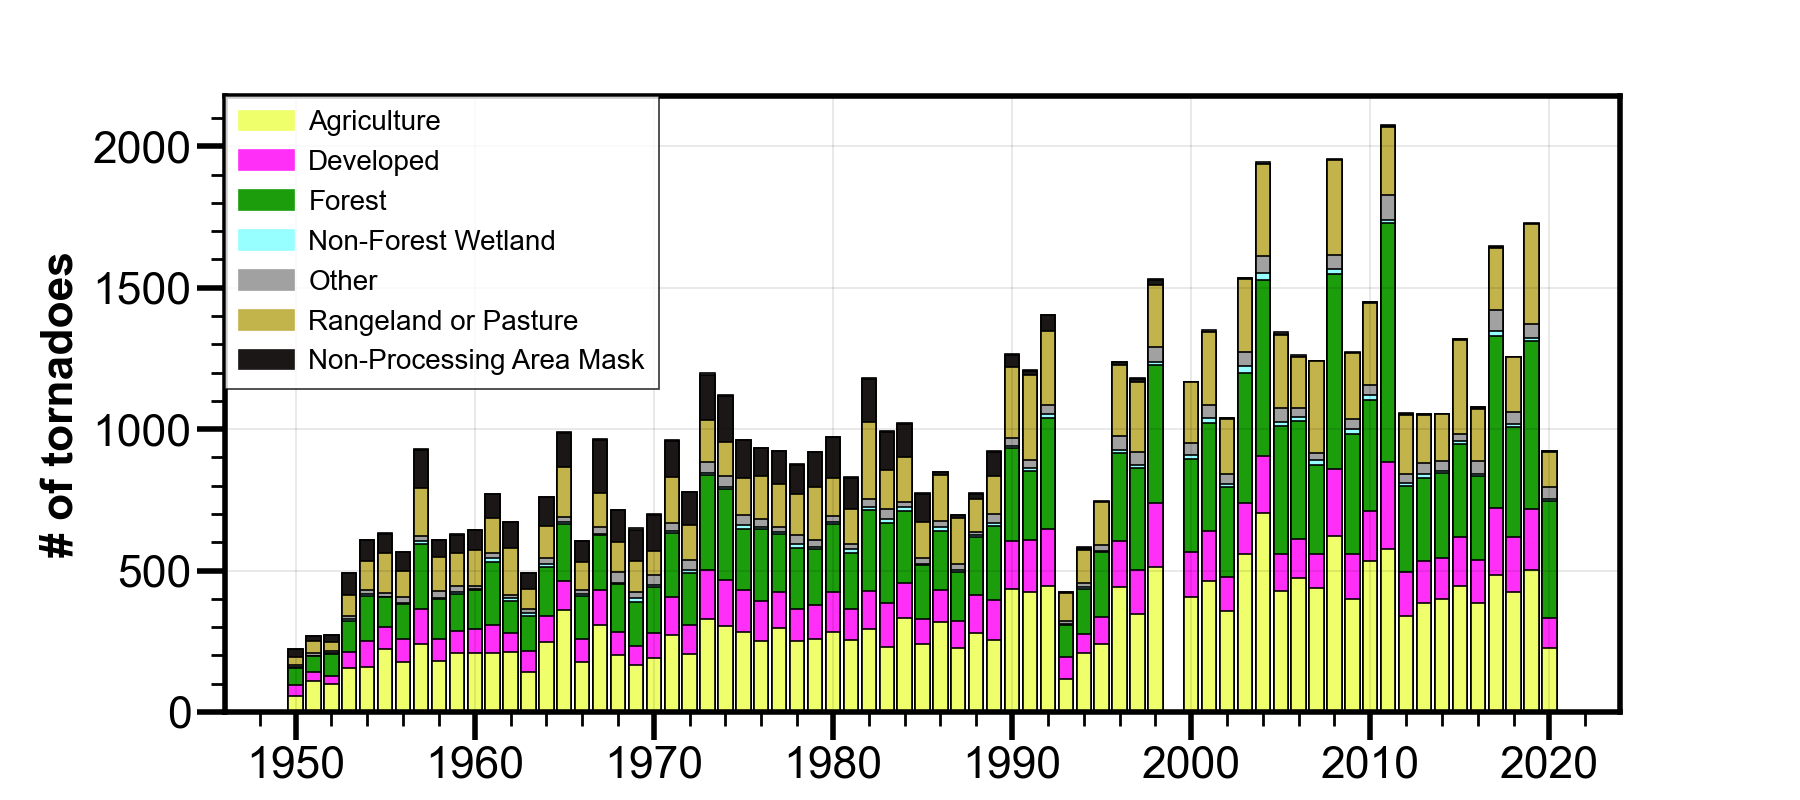

In [101]:
years= np.arange(1950,2021,1)
_lu= pd.DataFrame(index=np.arange(1,8), columns=['value'])
fig= plt.figure(figsize=(9,4), facecolor='white')
ax=fig.add_subplot(111)
ax.bar(years, [gdf.year_1.value_counts().sort_index()[y] if y in gdf.year_1.unique() else 0 for y in years], ec='k', color='gray')
# ax.format(ylabel='# of tornodoes')
for y in years:
    _gdf= gdf[gdf.year_1==y]
    val= _gdf.LandUse.value_counts()
    val.index= val.index.astype(int)
    _lu.loc[val.index, 'value']= val.values
    ax.bar([y]*7, _lu.cumsum().values.reshape(-1)[::-1], color=lu_colors[::-1], ec='k')
    _lu['value']=0
ax.legend(handles=[Patch(color=lu_colors[i-1], label=landuse_mapper[i]) for i in range(1,8)], fontsize=10)
ax.set_ylabel('# of tornadoes')
# ax.set_xlabel('Year')
plt.show();

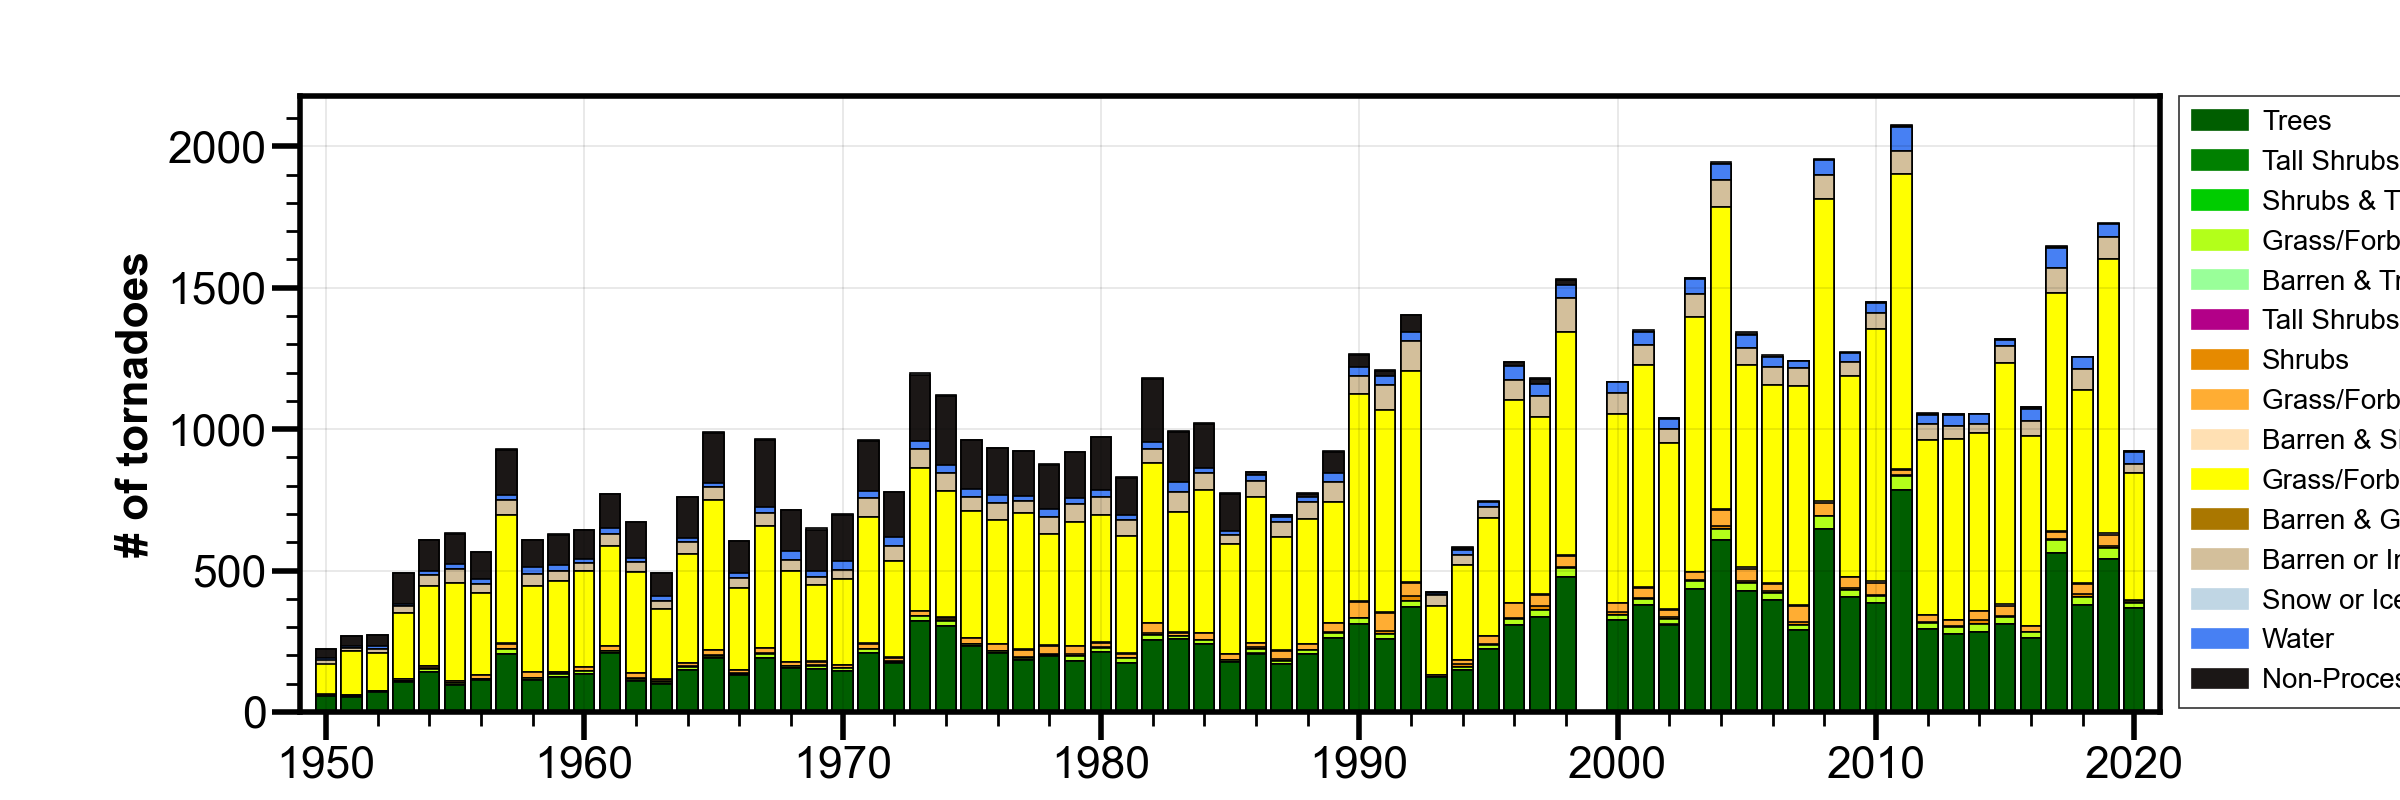

In [36]:
years= np.arange(1950,2021,1)
_lc= pd.DataFrame(index=np.arange(1,16), columns=['value'])
fig= plt.figure(figsize=(12,4), facecolor='white')
ax=fig.add_subplot(111)
ax.bar(years, [gdf.year_1.value_counts().sort_index()[y] if y in gdf.year_1.unique() else 0 for y in years], ec='k', color='gray')
# ax.format(ylabel='# of tornodoes')
for y in years:
    _gdf= gdf[gdf.year_1==y]
    val= _gdf.LandCover.value_counts()
    val.index= val.index.astype(int)
    _lc.loc[val.index, 'value']= val.values
    ax.bar([y]*15, _lc.cumsum().values.reshape(-1)[::-1], color=lc_colors[::-1], ec='k')
    _lc['value']=0
ax.legend(handles=[Patch(color=lc_colors[i-1], label=landcover_mapper[i]) for i in range(1,16)], 
          fontsize=10, bbox_to_anchor=(1.01,1))
ax.set_ylabel('# of tornadoes')
ax.set_xlim([1949,2021])
# ax.set_xlabel('Year')
plt.show();

In [37]:
new_df= gdf.groupby(['year_1', 'TOR_F_SCAL']).size().unstack(0)

In [13]:
gdf.BEGIN_YEAR.astype(str) + gdf.BEGIN_DAY.astype(str).str.zfill(2)

0        19500428
1        19500429
2        19500705
3        19500705
4        19500724
           ...   
69199    20200604
69200    20200628
69201    20200610
69202    20200607
69203    20200602
Length: 69204, dtype: object

In [3]:
gdf['date']= pd.to_datetime(gdf.BEGIN_YEAR.astype(str) + gdf.BEGIN_DAY.astype(str).str.zfill(2), format='%Y%m%d')

In [4]:
date_str= gdf['date'].dt.strftime('%Y-%m-%d').tolist()

In [21]:
_df= pd.DataFrame(index= pd.date_range('1950-01-01', '2019-12-31', freq='D'), columns=['isTday', 'isMultiTday', 'time'])
_df['isTday']= _df.apply(lambda x: 1 if x.name.strftime('%Y-%m-%d') in date_str else 0, axis=1)
_df['isMultiTday']= _df.apply(lambda x: 1 if x.name.strftime('%Y-%m-%d') in date_str and (gdf.date==x.name).sum()>1 else 0, axis=1)

Text(0.5, 0, 'year')

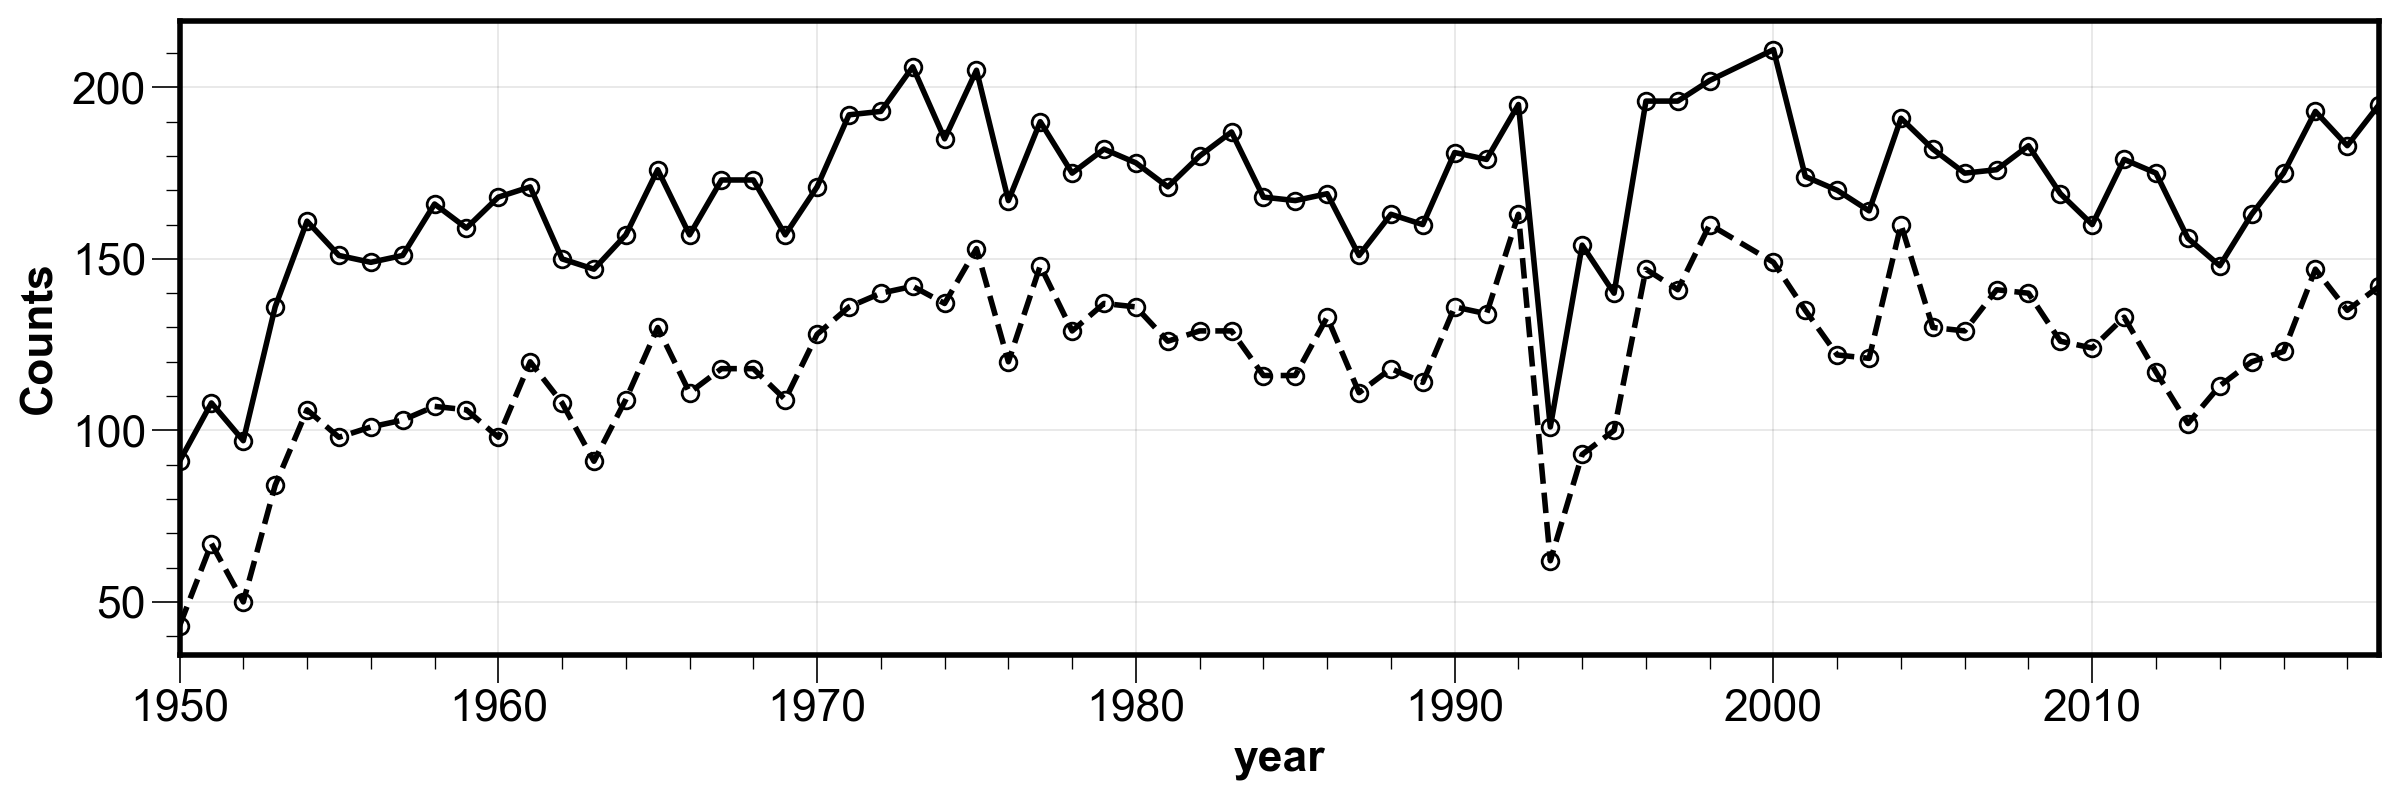

In [27]:
fig= pplt.figure(figsize=(12,4), facecolor='white')
ax= fig.add_subplot(111)
ax.plot(_df.loc[_df.isTday>0, ['isTday']].groupby(_df.loc[_df.isTday>0].index.year).size().index,
        _df.loc[_df.isTday>0, ['isTday']].groupby(_df.loc[_df.isTday>0].index.year).size().values,color='k', marker='o', markerfacecolor='None', label='Tornado days')

ax.plot(_df.loc[_df.isMultiTday>0, ['isMultiTday']].groupby(_df.loc[_df.isMultiTday>0].index.year).size().index,
        _df.loc[_df.isMultiTday>0, ['isMultiTday']].groupby(_df.loc[_df.isMultiTday>0].index.year).size().values, color='k', linestyle='dashed', marker='o', markerfacecolor='None', label='Multiple tornado days')
ax.set_ylabel('Counts')
ax.set_xlabel('year')

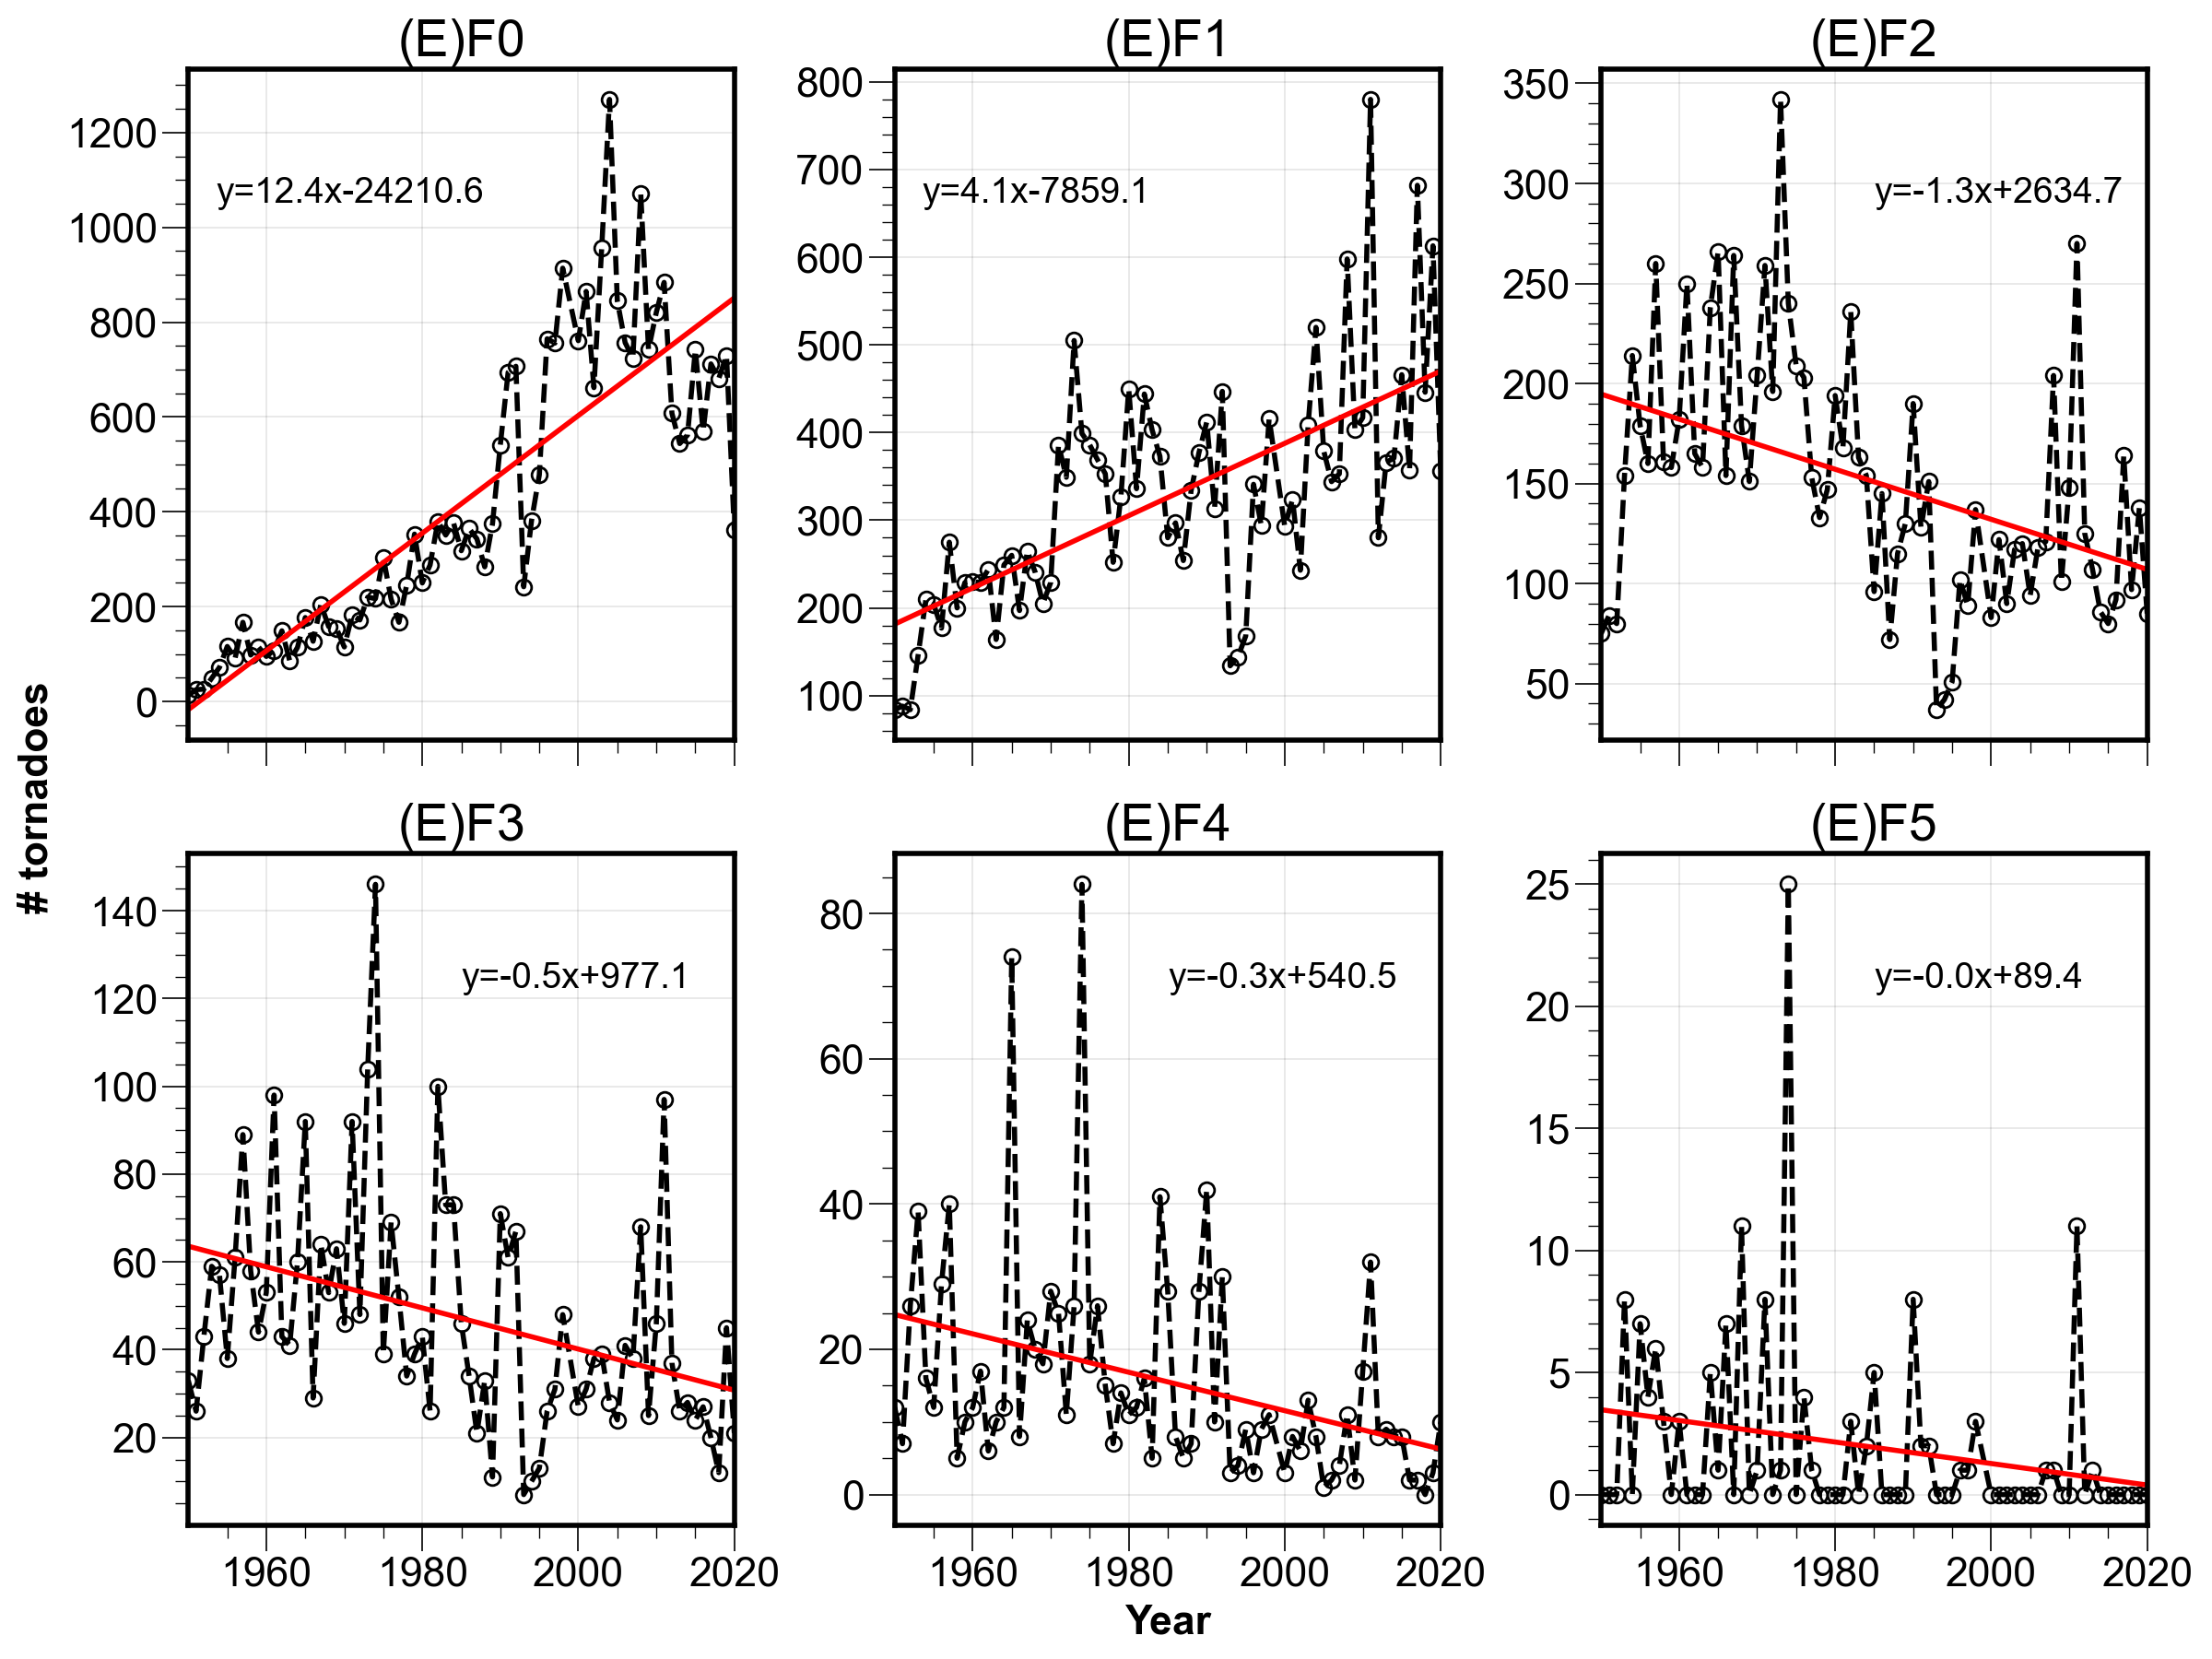

In [53]:
new_df= gdf.groupby(['year_1', 'TOR_F_SCAL']).size().unstack(0)
fig= pplt.figure(figsize=(12,9), sharey=1, facecolor='white')
for i in range(6):
    _df= new_df.loc[['F%d'%i,'EF%d'%i]].sum(axis=0)
    ax= fig.add_subplot(2,3,i+1 )
    # _df= new_df.loc[scale]
    ax.plot(_df.index, _df.values, color='k', linestyle='--', marker='o', markerfacecolor='None')
    x= np.array(_df.index)
    y= _df.values
    mask= ~(np.isnan(x) & np.isnan(y))
    s,z= np.polyfit(x[mask], y[mask], deg=1)
    ax.plot(np.arange(1950,2021), s*np.arange(1950,2021)+z, color='r')
    if i<2:
        ax.text(0.05, 0.8, 'y=%.1fx%.1f'%(s,z), transform=ax.transAxes, color='k', fontsize=14)
    else:
        ax.text(0.5, 0.8, 'y=%.1fx+%.1f'%(s,z), transform=ax.transAxes, color='k', fontsize=14)
    ax.set_title('(E)F%d'%i)
    if i==0: ax.set_ylabel('Tornado days')
fig.format(xlabel='Year')
plt.show();

In [6]:
new_df= gdf.groupby(['year_1', 'TOR_F_SCAL']).size().unstack(0)
fig= pplt.figure(figsize=(12,9), sharey=1, facecolor='white')
for i in range(6):
    _df= new_df.loc[['F%d'%i,'EF%d'%i]].sum(axis=0)
    ax= fig.add_subplot(2,3,i+1 )
    # _df= new_df.loc[scale]
    ax.plot(_df.index, _df.values, color='k', linestyle='--', marker='o', markerfacecolor='None')
    x= np.array(_df.index)
    y= _df.values
    mask= ~(np.isnan(x) & np.isnan(y))
    s,z= np.polyfit(x[mask], y[mask], deg=1)
    ax.plot(np.arange(1950,2021), s*np.arange(1950,2021)+z, color='r')
    if i<2:
        ax.text(0.05, 0.8, 'y=%.1fx%.1f'%(s,z), transform=ax.transAxes, color='k', fontsize=14)
    else:
        ax.text(0.5, 0.8, 'y=%.1fx+%.1f'%(s,z), transform=ax.transAxes, color='k', fontsize=14)
    ax.set_title('(E)F%d'%i)
    if i==0: ax.set_ylabel('# tornadoes')
fig.format(xlabel='Year')
plt.show();

,Unnamed_ 0,BEGIN_YEAR,BEGIN_DAY,BEGIN_TIME,END_YEARMO,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,...,year_1,LandCover,LandUse,year_2,LandCover_,LandUse_Be,LandCove_1,LandUse_En,DistUrban,geometry
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,1950,10,1,1950,15,1,15,1,0.921954,POINT (-99.20000 35.12000)
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,1950,12,7,1950,15,7,15,7,12.646343,POINT (-98.60000 31.90000)
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,1950,10,3,1950,10,3,10,4,0.100000,POINT (-75.70000 40.58000)
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,1950,10,1,1950,10,1,None,None,0.282843,POINT (-76.75000 40.60000)
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,1950,10,2,1950,1,2,None,None,0.000000,POINT (-79.68000 41.63000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69199,39717,202006,4,159,202006,4,200,148826.0,896594,MISSOURI,...,2020,1,2,2020,1,2,10,3,0.000000,POINT (-94.33160 38.47190)
69200,39828,202006,28,1954,202006,28,1956,149511.0,901206,MINNESOTA,...,2020,10,1,2020,10,1,14,1,0.200000,POINT (-91.72380 44.03180)
69201,39961,202006,10,1718,202006,10,1724,147398.0,886388,OHIO,...,2020,10,1,2020,10,1,10,3,0.100000,POINT (-83.07910 39.37860)
69202,39964,202006,7,1741,202006,7,1742,147784.0,889521,FLORIDA,...,2020,14,5,2020,1,5,1,3,0.707107,POINT (-81.70400 28.79140)


In [17]:
y.shape

(7,)

In [36]:
(gdf.DistUrban<0.5).sum()/len(gdf[~pd.isna(gdf.DistUrban)])

0.5172338979128397

In [ ]:
gdf.BEGIN_LON

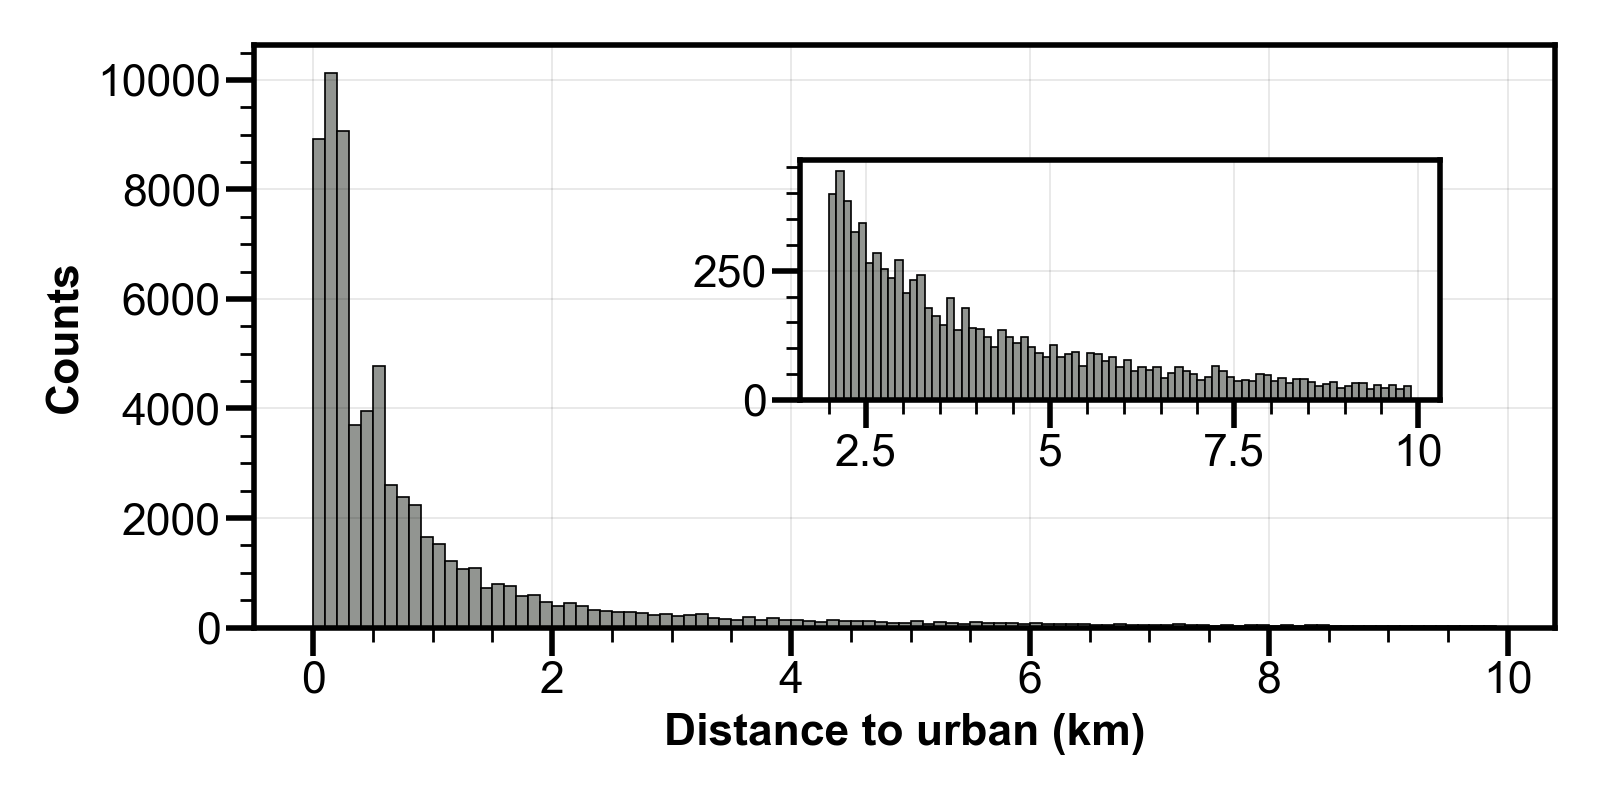

In [34]:
fig=plt.figure(figsize=(8,4), facecolor='white')
ax= fig.add_subplot(111)
# y,x= np.histogram(gdf.DistUrban, bins= [0,0.1,0.2,0.5,1,2,5,10])
# ax.bar([(x[i]+x[i+1])/2 for i in range(len(x)-1)],height=y)
ax.hist(gdf.DistUrban, bins=np.arange(0,10,0.1), ec='k', fc='gray')
ax2= fig.add_axes([0.5,0.5,0.4,0.3])
ax2.hist(gdf.DistUrban, bins=np.arange(2,10,0.1), ec='k', fc='gray')
ax.set_ylabel('Counts')
ax.set_xlabel('Distance to urban (km)')
plt.show();
# gdf.DistUrban.plot(kind='box', showfliers=False)